<a href="https://colab.research.google.com/github/keshavvprabhu/machine_learning/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

## Linear SVR

Support Vector Regression was invented by Vladimir Vapnik at Bell Labs
Support Vector Linear Regression has a tube-like structure "epsilon" insensitive tube and anything within the tube is not considered an error
or within the error tolerance level

Every point on the graph is a vector. SVR cares about the error points lying outside the SVR epsilon tube

Reference: https://core.ac.uk/download/pdf/81523322.pdf

## Non Linear SVR
Non Linear Support Vector Regression

### Section on SVM

### Section on Kernel SVM


## Importing the Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [18]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [19]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [20]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [21]:
y = y.reshape(len(y), 1)

In [22]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [40]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [41]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR Model on the while dataset

In [42]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')   ## radial basis function - Gaussian SVR kernel functions
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [43]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualizing SVR Results

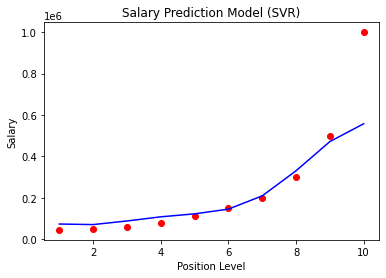

In [44]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title("Salary Prediction Model (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualizing SVR Results (for higher Resolution and smoother curves)

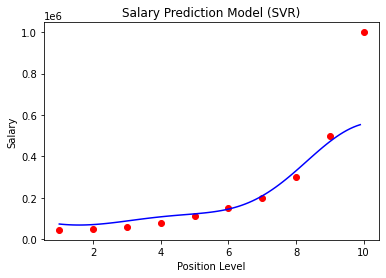

In [59]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
# plt.show()
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title("Salary Prediction Model (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()